In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Variables' distribution and Logarithm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

''

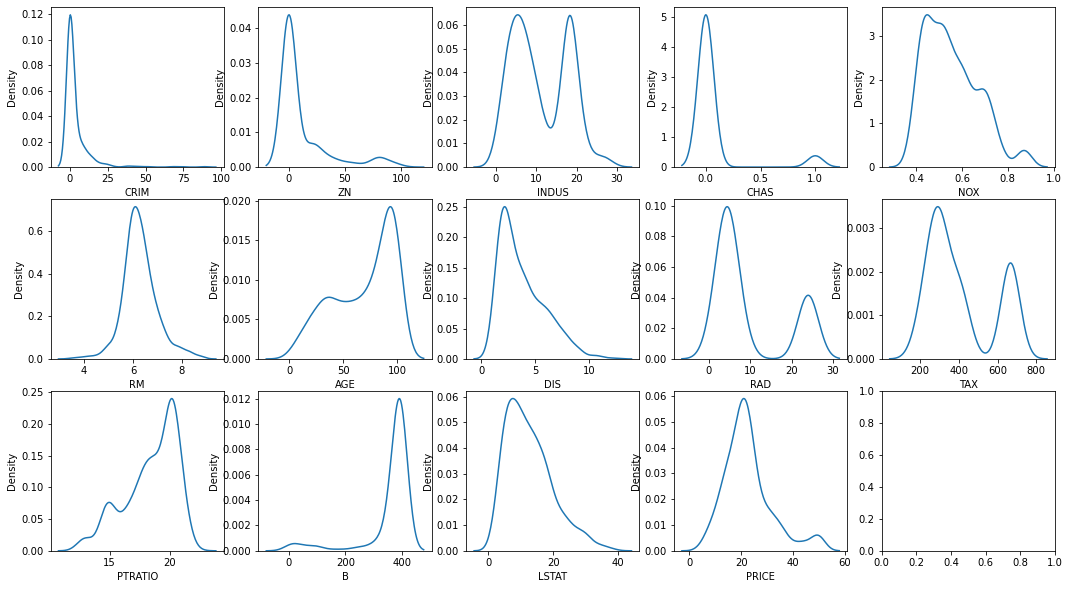

In [3]:
fig, axes = plt.subplots(figsize=(18, 10), nrows=3, ncols=5)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.distplot(boston[col], kde=True, ax=ax, hist=False)
;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

''

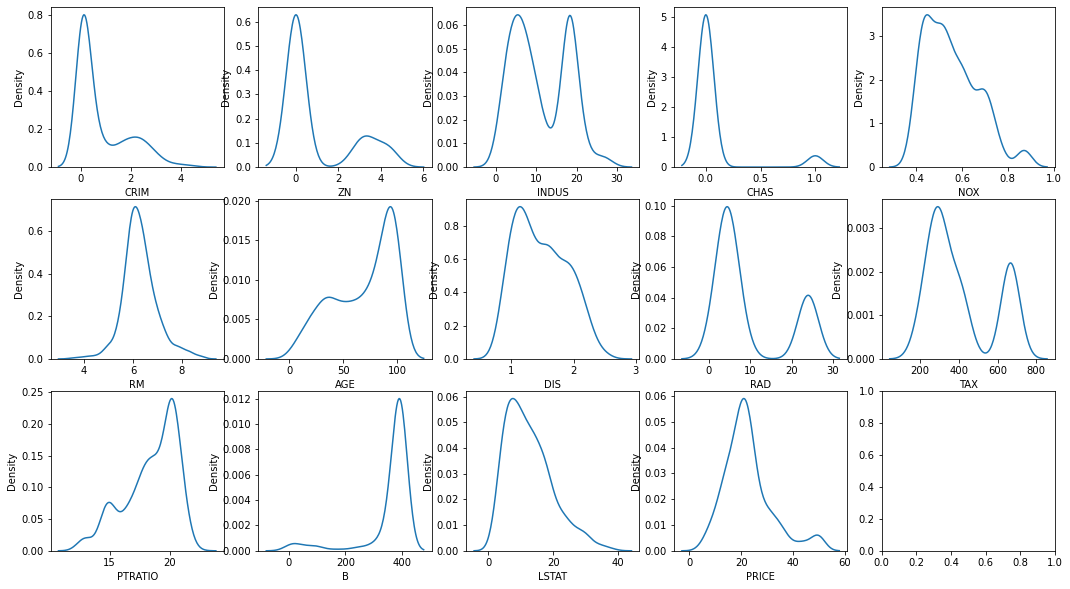

In [4]:
LogColumns_list = ['CRIM', 'ZN', 'DIS']
boston.loc[:, LogColumns_list] = np.log1p(boston[LogColumns_list])

fig, axes = plt.subplots(figsize=(18, 10), nrows=3, ncols=5)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.distplot(boston[col], kde=True, ax=ax, hist=False)
;

### Let's see how each input variable affects Housing Price with scatter plots!

''

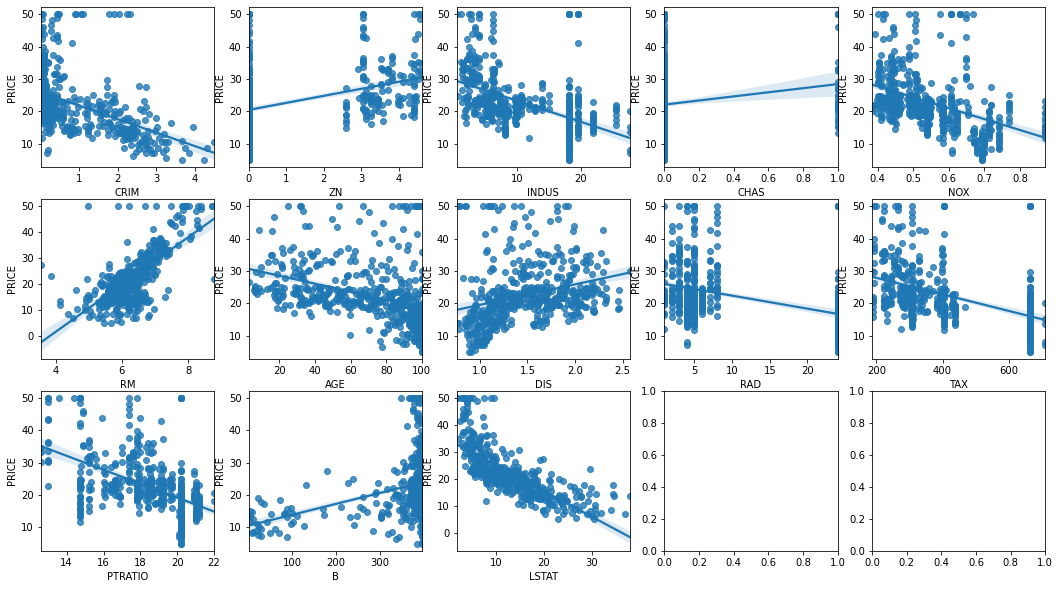

In [5]:
x = boston.drop(columns='PRICE')
y = boston['PRICE']

fig, axes = plt.subplots(figsize=(18, 10), nrows=3, ncols=5)

for col, ax in zip(x.columns, axes.reshape(15)):
    sns.regplot(x=x[col], y=y, ax=ax)
;

### Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_predicted = lr.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_predicted).round(4))
print('R2:', r2_score(y_test, y_predicted).round(4))

MAE: 3.5456
R2: 0.6786


### Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [10]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_predicted = lr.predict(x_test_scaled)

print('MAE:', mean_absolute_error(y_test, y_predicted).round(4))
print('R2:', r2_score(y_test, y_predicted).round(4))

MAE: 3.5456
R2: 0.6786


### Linear Regression: coefficients & intercept

In [11]:
print('Coefficients:', lr.coef_.round(4))

Coefficients: [-1.0971  0.3092 -0.2893  0.7807 -1.5902  3.3712 -0.6104 -3.6123  2.1502
 -1.6415 -1.8151  1.1637 -3.4974]


In [12]:
print('Intercept:', lr.intercept_.round(4))

Intercept: 22.6983


In [13]:
coeff = pd.Series(data=lr.coef_.round(4), index=x.columns)
coeff.sort_values(ascending=False)

RM         3.3712
RAD        2.1502
B          1.1637
CHAS       0.7807
ZN         0.3092
INDUS     -0.2893
AGE       -0.6104
CRIM      -1.0971
NOX       -1.5902
TAX       -1.6415
PTRATIO   -1.8151
LSTAT     -3.4974
DIS       -3.6123
dtype: float64

### Polynomial Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.fit_transform(x_test_scaled)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)
y_predicted = lr.predict(x_test_poly)

print('MAE:', mean_absolute_error(y_test, y_predicted).round(4))
print('R2:', r2_score(y_test, y_predicted).round(4))

MAE: 2.6111
R2: 0.8503


### Regularization: (1) Ridge (L2)

In [18]:
from sklearn.linear_model import Ridge

params_list = [0.001, 0.01, 0.1, 1, 10, 100]
MAE_list = []
R2_list = []

for param in params_list:
    lrRidge = Ridge(alpha=param)
    lrRidge.fit(x_train_scaled, y_train)
    y_predicted = lrRidge.predict(x_test_scaled)
    MAE_list.append(mean_absolute_error(y_test, y_predicted).round(4))
    R2_list.append(r2_score(y_test, y_predicted).round(4))

print('MAE:', np.round(MAE_list, 2))
print('R2:', np.round(R2_list, 2))

MAE: [3.55 3.55 3.55 3.54 3.52 3.52]
R2: [0.68 0.68 0.68 0.68 0.67 0.65]


''

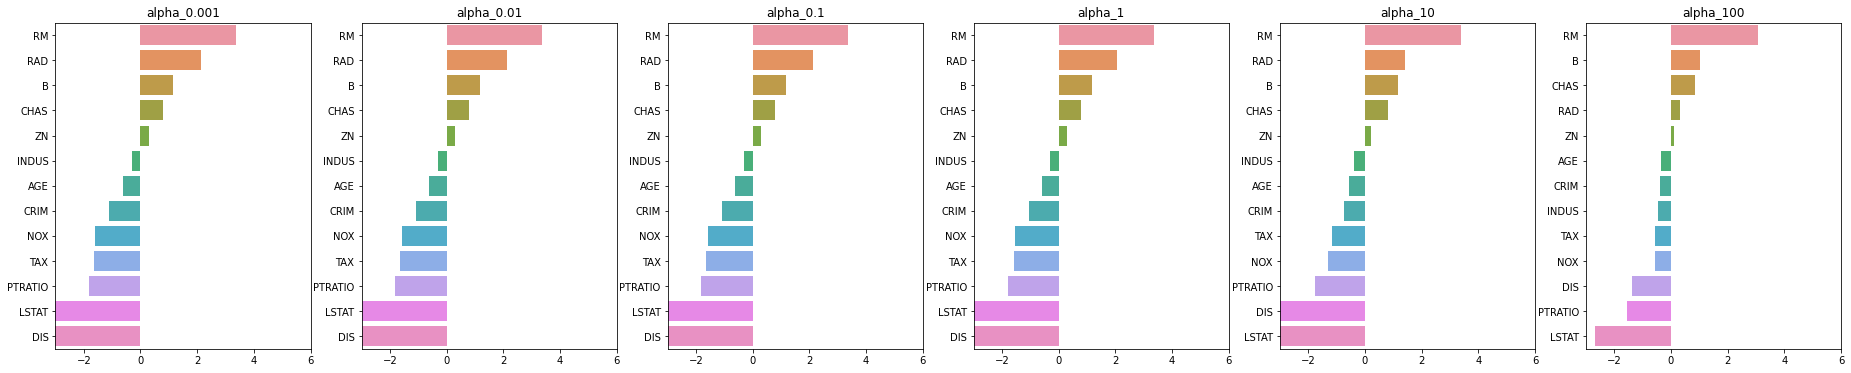

In [19]:
fig, axes = plt.subplots(figsize=(32, 6), ncols=6)

for param, ax in zip(params_list, axes):
    lrRidge = Ridge(alpha=param)
    lrRidge.fit(x_train_scaled, y_train)
    
    coeff = pd.Series(data=lrRidge.coef_, index=x.columns)
    coeff = coeff.sort_values(ascending=False)
    
    ax.set_title('alpha_' + str(param))
    ax.set_xlim(-3, 6)
    sns.barplot(ax=ax, x=coeff.values, y=coeff.index)
;

### Regularization: (2) Lasso (L1)

In [20]:
from sklearn.linear_model import Lasso

params_list = [0.001, 0.01, 0.1, 1, 10, 100]
MAE_list = []
R2_list = []

for param in params_list:
    lrLasso = Lasso(alpha=param)
    lrLasso.fit(x_train_scaled, y_train)
    y_predicted = lrLasso.predict(x_test_scaled)
    MAE_list.append(mean_absolute_error(y_test, y_predicted).round(2))
    R2_list.append(r2_score(y_test, y_predicted).round(2))
    
print('MAE:', np.round(MAE_list, 2))
print('R2:', np.round(R2_list, 2))

MAE: [3.55 3.54 3.58 3.79 6.71 6.71]
R2: [ 0.68  0.68  0.66  0.63 -0.   -0.  ]


''

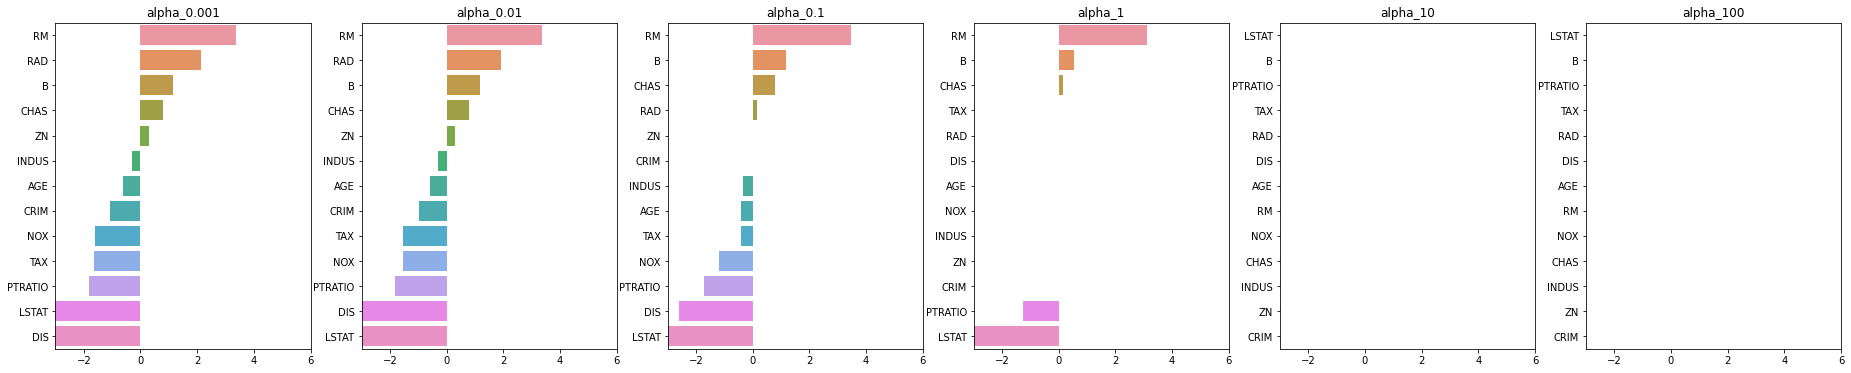

In [21]:
fig, axes = plt.subplots(figsize=(32, 6), ncols=6)

for param, ax in zip(params_list, axes):
    lrLasso = Lasso(alpha=param)
    lrLasso.fit(x_train_scaled, y_train)
    
    coeff = pd.Series(data=lrLasso.coef_, index=x.columns)
    coeff = coeff.sort_values(ascending=False)
    
    ax.set_title('alpha_' + str(param))
    ax.set_xlim(-3, 6)
    sns.barplot(ax=ax, x=coeff.values, y=coeff.index)
;